In [1]:
import pandas as pd
import numpy as np

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report

In [3]:
wine_df=pd.read_csv('wine_data.csv')

In [4]:
wine_df.head()

,country,province,description,points,production_cost,price,taster_name,winery
0,Germany,Mosel,Zesty orange peels and apple notes abound in t...,87,5.11,24.0,Anna Lee C. Iijima,Richard Böcking
1,Argentina,Other,"Baked plum, molasses, balsamic vinegar and che...",87,4.96,30.0,Michael Schachner,Felix Lavaque
2,Argentina,Mendoza Province,Raw black-cherry aromas are direct and simple ...,87,1.96,13.0,Michael Schachner,Gaucho Andino
3,US,Virginia,"Red fruit aromas pervade on the nose, with cig...",87,6.40,32.0,Alexander Peartree,Quiévremont
4,US,Oregon,"A stiff, tannic wine, this slowly opens and br...",86,4.40,22.0,Paul Gregutt,Hawkins Cellars


In [5]:
wine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10587 entries, 0 to 10586
Data columns (total 8 columns):
country            10583 non-null object
province           10583 non-null object
description        10587 non-null object
points             10587 non-null int64
production_cost    10587 non-null float64
price              9914 non-null float64
taster_name        8511 non-null object
winery             10587 non-null object
dtypes: float64(2), int64(1), object(5)
memory usage: 661.8+ KB


In [6]:
wine_df.columns

Index(['country', 'province', 'description', 'points', 'production_cost',
       'price', 'taster_name', 'winery'],
      dtype='object')

In [7]:
wine_df.describe()

,points,production_cost,price
count,10587.000000,10587.000000,9914.000000
mean,88.486729,7.957334,42.152007
std,3.090622,20.929321,96.089313
min,80.000000,0.000000,4.000000
25%,86.000000,2.870000,17.000000
50%,88.000000,4.800000,25.000000
75%,91.000000,8.110000,42.000000
max,100.000000,994.250000,3300.000000


In [8]:
wine_df.isna().sum()

country               4
province              4
description           0
points                0
production_cost       0
price               673
taster_name        2076
winery                0
dtype: int64

In [9]:
wine_df.dropna(subset=['price'],axis=0,inplace=True)

In [19]:
wine_df[wine_df['country'].isnull()].head()
      

,country,province,description,points,production_cost,price,taster_name,winery
353,NaN,NaN,"Violet-red in color, this semisweet wine has a...",88,5.39,18.0,Mike DeSimone,Kakhetia Traditional Winemaking
3086,NaN,NaN,Subdued citrus and pear notes on the nose find...,89,4.80,24.0,Anne Krebiehl MW,Neumeister
10539,NaN,NaN,El Capricho is one of Uruguay's more consisten...,89,5.75,22.0,Michael Schachner,El Capricho
10579,NaN,NaN,This wine offers a delightful bouquet of black...,91,5.85,32.0,Mike DeSimone,Psagot


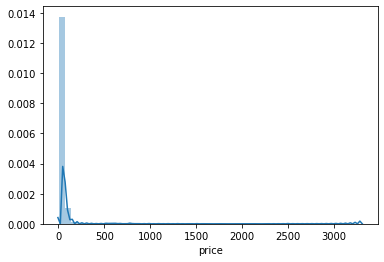

In [13]:
sns.distplot(wine_df['price'])

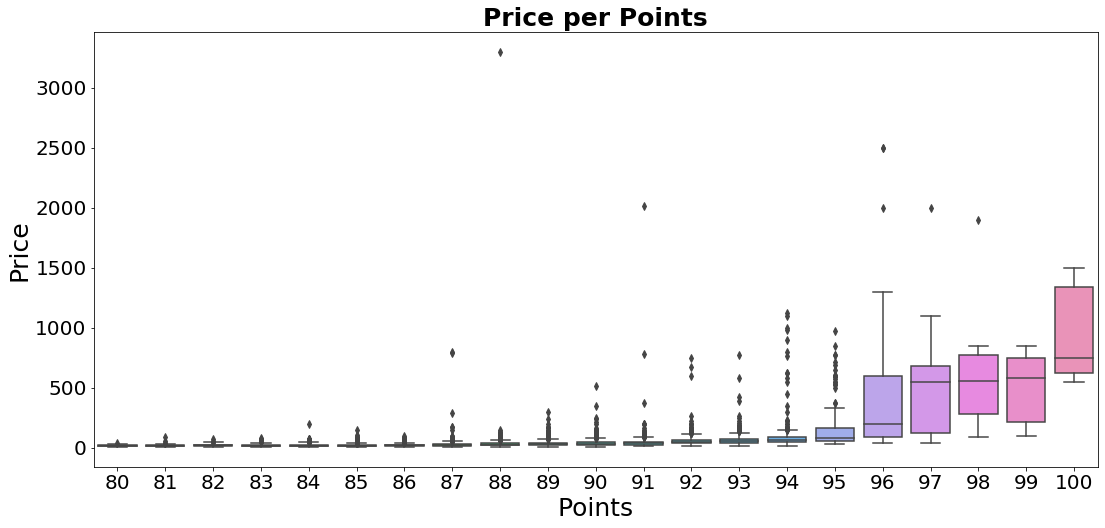

In [14]:
fig, ax = plt.subplots(figsize=(18,8))
sns.boxplot(x='points', y='price', data=wine_df)
plt.xticks(fontsize=20) # X Ticks
plt.yticks(fontsize=20) # Y Ticks
ax.set_title('Price per Points', fontweight="bold", size=25) # Title
ax.set_ylabel('Price', fontsize = 25) # Y label
ax.set_xlabel('Points', fontsize = 25) # X label
plt.show()

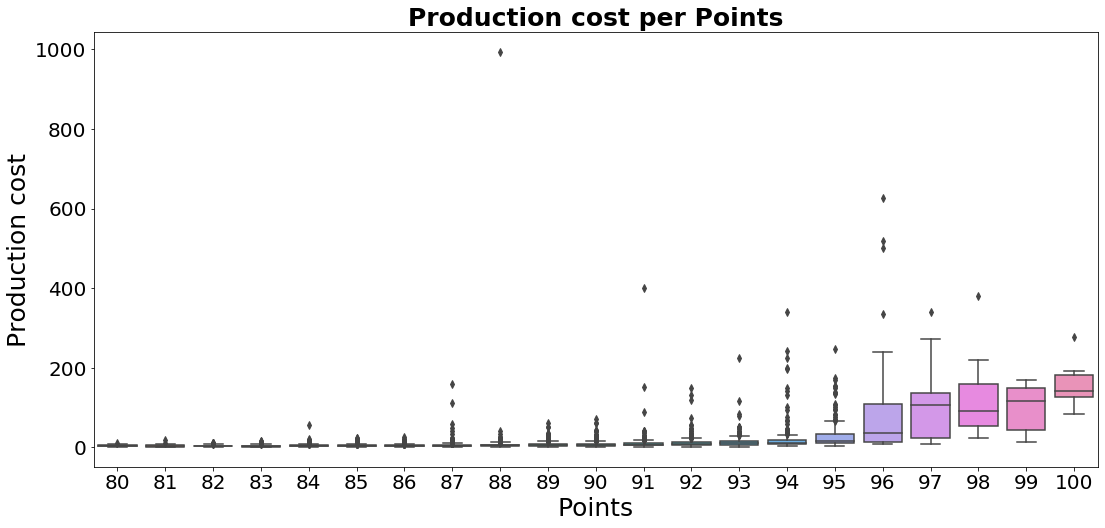

In [13]:
fig, ax = plt.subplots(figsize=(18,8))
sns.boxplot(x='points', y='production_cost', data=wine_df)
plt.xticks(fontsize=20) # X Ticks
plt.yticks(fontsize=20) # Y Ticks
ax.set_title('Production cost per Points', fontweight="bold", size=25) # Title
ax.set_ylabel('Production cost', fontsize = 25) # Y label
ax.set_xlabel('Points', fontsize = 25) # X label
plt.show()

In [14]:
wine_df.shape

(9914, 8)

In [15]:
wine_df.drop_duplicates('description',keep='last',inplace=True)
wine_df.shape

(9839, 8)

In [16]:
wine_df.loc[wine_df['winery'] == 'Kakhetia Traditional Winemaking', 'country'] = 'US'  
wine_df.loc[wine_df['winery'] == 'Kakhetia Traditional Winemaking', 'province']='Georgia'

wine_df.loc[wine_df['winery'] == 'Neumeister', 'country'] = 'Austria'  
wine_df.loc[wine_df['winery'] == 'Neumeister', 'province']='Straden'

wine_df.loc[wine_df['winery'] == 'El Capricho', 'country'] = 'Uruguay'  
wine_df.loc[wine_df['winery'] == 'El Capricho', 'province']='Durazno'

wine_df.loc[wine_df['winery'] == 'Psagot', 'country'] = 'Israel'  
wine_df.loc[wine_df['winery'] == 'Psagot', 'province']='West Bank'

In [17]:
wine_df.isna().sum()

country               0
province              0
description           0
points                0
production_cost       0
price                 0
taster_name        1947
winery                0
dtype: int64

In [18]:
wine_df.shape

(9839, 8)

In [19]:
uniqueValues = wine_df['province'].nunique()
print(uniqueValues)

255


In [20]:
uniqueValues = wine_df['winery'].nunique()
print(uniqueValues)

5351


In [21]:
df1=round(wine_df.groupby([wine_df['country']]).mean(),2)
df1

,points,production_cost,price
country,,,
Argentina,86.74,4.69,23.67
Australia,88.75,10.28,49.78
Austria,90.54,7.48,34.64
Bosnia and Herzegovina,88.00,2.13,12.00
Brazil,83.60,5.23,22.20
Bulgaria,87.88,3.07,14.69
Canada,88.75,7.15,33.70
Chile,86.45,4.26,21.30
Croatia,87.25,5.66,30.25


In [22]:
wine_df.groupby([wine_df['country']]).sum()

,points,production_cost,price
country,,,
Argentina,28104,1519.71,7668.0
Australia,17572,2034.68,9857.0
Austria,19284,1592.84,7378.0
Bosnia and Herzegovina,88,2.13,12.0
Brazil,418,26.17,111.0
Bulgaria,1406,49.07,235.0
Canada,1775,143.00,674.0
Chile,29478,1453.76,7263.0
Croatia,349,22.66,121.0


In [23]:
wine_df['country'].value_counts()

US                        4312
France                    1501
Italy                     1376
Spain                      567
Portugal                   414
Chile                      341
Argentina                  324
Austria                    213
Australia                  198
Germany                    193
New Zealand                103
South Africa                91
Israel                      34
Greece                      31
Canada                      20
Bulgaria                    16
Romania                     15
Uruguay                     12
Turkey                      12
Hungary                     11
England                      8
Mexico                       8
Moldova                      6
Georgia                      6
Slovenia                     5
Brazil                       5
Croatia                      4
Ukraine                      3
Peru                         3
Switzerland                  2
Morocco                      1
Luxembourg                   1
Czech Re

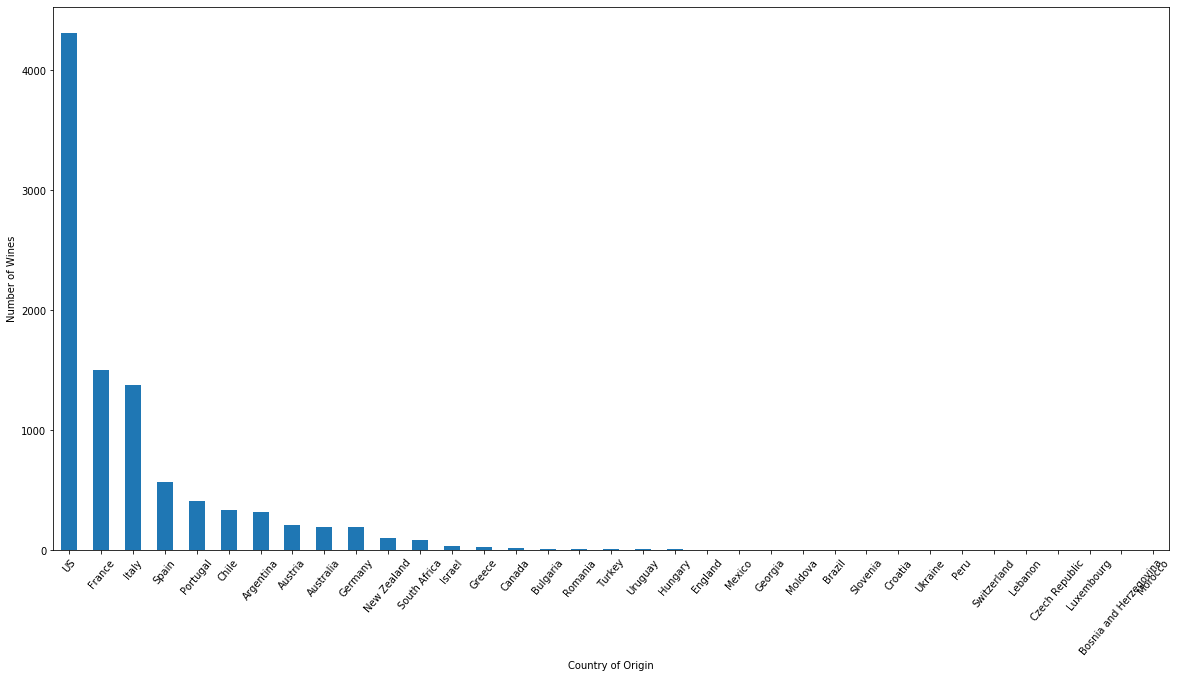

In [27]:
fig, ax = plt.subplots(figsize=(20,10))
wine_df.groupby("country").size().sort_values(ascending=False).plot(ax=ax, kind='bar')
plt.xticks(rotation=50)
plt.xlabel("Country of Origin")
plt.ylabel("Number of Wines")
plt.show()

In [25]:
wine_df['profit']=wine_df['price']-wine_df['production_cost']
wine_df['profit']

0        18.89
1        25.04
2        11.04
3        25.60
4        17.60
         ...  
10582    35.91
10583    25.60
10584    15.00
10585    27.25
10586    25.68
Name: profit, Length: 9839, dtype: float64

In [156]:
wine_df[['points','winery','production_cost','price','profit']].groupby(wine_df['country']).max().sort_values(by="points",ascending=False)

,points,winery,production_cost,price,profit
country,,,,,
Italy,100,Zymè,241.14,900.0,750.19
France,100,Zusslin,994.25,3300.0,2305.75
Portugal,100,Wines & Winemakers,224.73,1000.0,856.40
US,99,àMaurice,401.30,2013.0,1611.70
Australia,99,Yeringberg,170.00,850.0,680.00
Germany,98,Ökonomierat Rebholz,219.92,775.0,620.21
Austria,97,Zull,340.65,1100.0,759.35
Spain,96,Zudugarai,154.00,770.0,616.00
New Zealand,95,Yealands,20.81,120.0,99.19


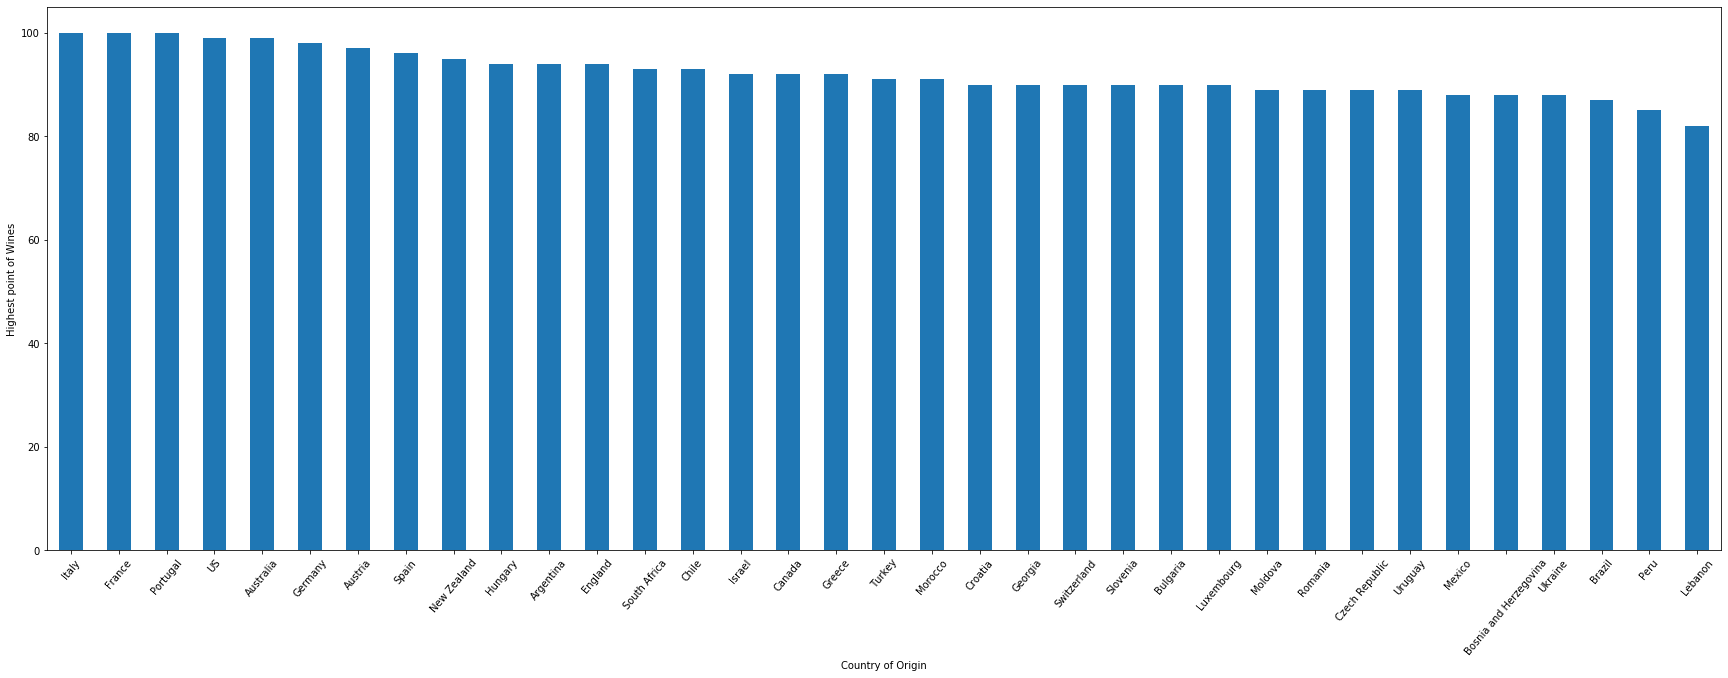

In [157]:
fig, ax = plt.subplots(figsize=(30,10))
wine_df.groupby('country').max().sort_values(by="points",ascending=False)["points"].plot(ax=ax,kind='bar')
plt.xticks(rotation=50)
plt.xlabel("Country of Origin")
plt.ylabel("Highest point of Wines")
plt.show()

In [158]:
uniqueValues = wine_df['taster_name'].unique()
print(uniqueValues)

['Anna Lee C. Iijima' 'Michael Schachner' 'Alexander Peartree'
 'Paul Gregutt' nan 'Roger Voss' 'Sean P. Sullivan' 'Kerin O’Keefe'
 'Virginie Boone' 'Matt Kettmann' 'Joe Czerwinski' 'Lauren Buzzeo'
 'Anne Krebiehl\xa0MW' 'Jim Gordon' 'Susan Kostrzewa' 'Jeff Jenssen'
 'Mike DeSimone' 'Christina Pickard' 'Carrie Dykes']


In [159]:
taster_group1= round(pd.pivot_table(wine_df,['points'],index=wine_df[['taster_name']]),2)
taster_group1

,points
taster_name,
Alexander Peartree,86.19
Anna Lee C. Iijima,88.63
Anne Krebiehl MW,90.82
Carrie Dykes,86.86
Christina Pickard,93.00
Jeff Jenssen,87.90
Jim Gordon,88.49
Joe Czerwinski,88.75
Kerin O’Keefe,89.02


In [160]:
wine_df['taster_name'].groupby([wine_df['country']]).value_counts()

country                 taster_name       
Argentina               Michael Schachner      323
Australia               Joe Czerwinski         175
                        Christina Pickard        1
Austria                 Anne Krebiehl MW       160
                        Roger Voss              52
Bosnia and Herzegovina  Jeff Jenssen             1
Brazil                  Michael Schachner        5
Bulgaria                Jeff Jenssen            14
                        Anna Lee C. Iijima       2
Canada                  Paul Gregutt            15
                        Sean P. Sullivan         3
                        Anna Lee C. Iijima       1
                        Joe Czerwinski           1
Chile                   Michael Schachner      332
                        Joe Czerwinski           1
Croatia                 Anna Lee C. Iijima       3
                        Jeff Jenssen             1
Czech Republic          Jeff Jenssen             1
England                 Anne Krebiehl M

In [23]:
df1=wine_df['taster_name'].groupby([wine_df['points']]).value_counts()

In [24]:
df1.head(20)

points  taster_name       
80      Michael Schachner     22
        Virginie Boone         3
        Joe Czerwinski         2
        Roger Voss             2
        Jim Gordon             1
81      Michael Schachner     20
        Roger Voss             3
        Joe Czerwinski         2
        Virginie Boone         2
        Alexander Peartree     1
        Paul Gregutt           1
82      Michael Schachner     43
        Roger Voss             8
        Virginie Boone         7
        Paul Gregutt           6
        Jim Gordon             5
        Joe Czerwinski         3
        Anna Lee C. Iijima     1
        Matt Kettmann          1
        Sean P. Sullivan       1
Name: taster_name, dtype: int64

In [163]:
wine_df.groupby(['taster_name']).count()['points']

taster_name
Alexander Peartree      31
Anna Lee C. Iijima     373
Anne Krebiehl MW       260
Carrie Dykes             7
Christina Pickard        1
Jeff Jenssen            42
Jim Gordon             347
Joe Czerwinski         417
Kerin O’Keefe          799
Lauren Buzzeo          107
Matt Kettmann          476
Michael Schachner     1258
Mike DeSimone           37
Paul Gregutt           790
Roger Voss            1737
Sean P. Sullivan       380
Susan Kostrzewa         81
Virginie Boone         749
Name: points, dtype: int64

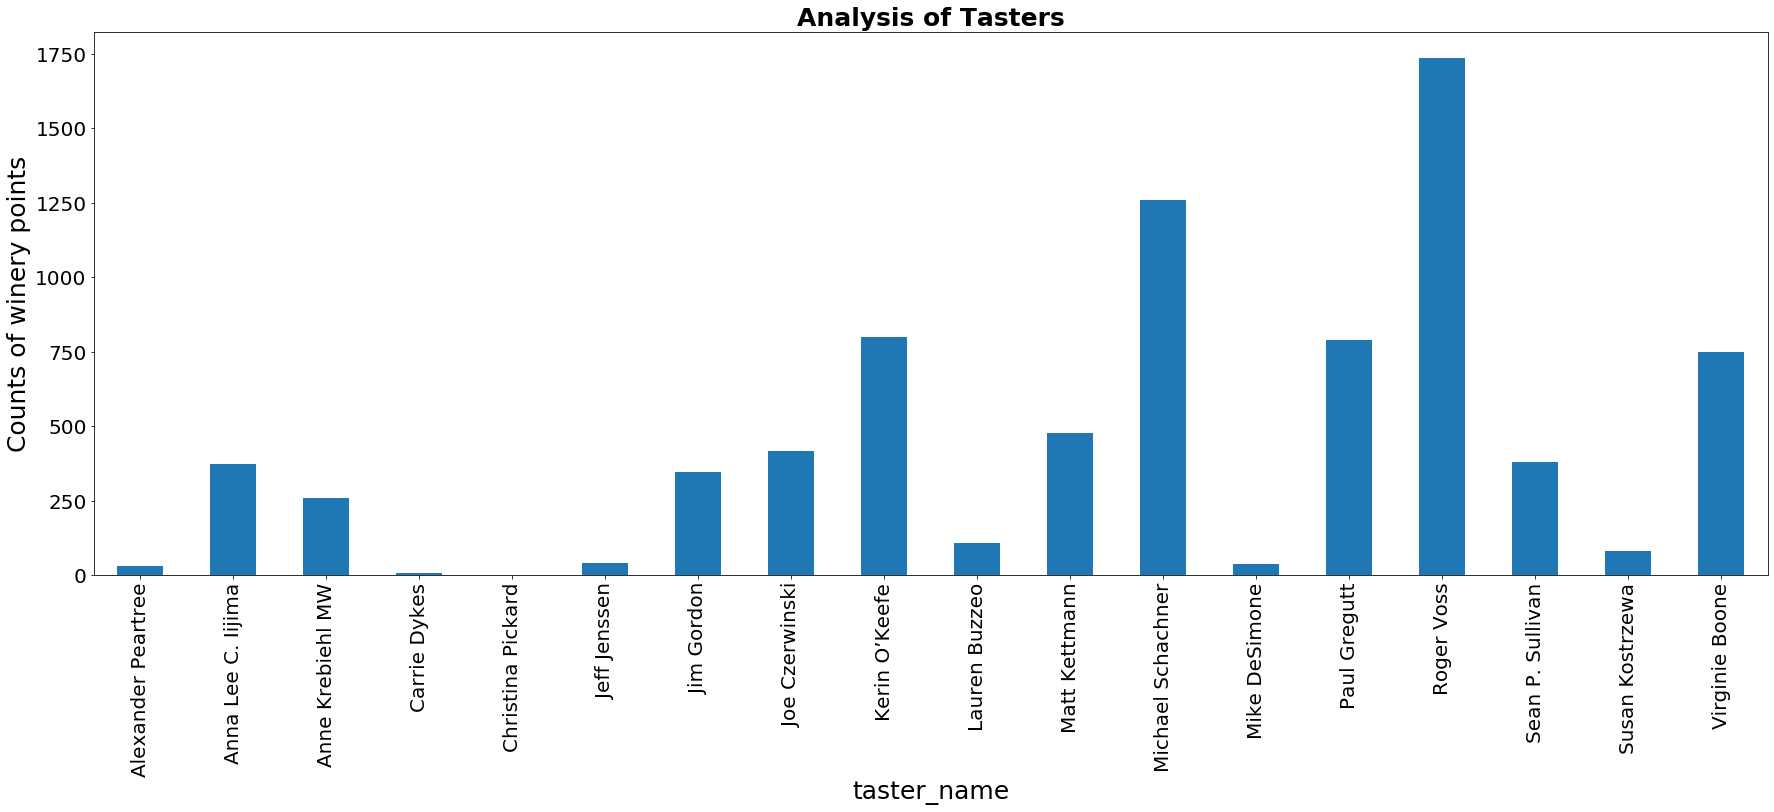

In [22]:
fig, ax = plt.subplots(figsize=(30,10))
plt.xticks(fontsize=20) # X Ticks
plt.yticks(fontsize=20) # Y Ticks
ax.set_title('Analysis of Tasters', fontweight="bold", size=25) # Title
ax.set_xlabel('taster_name', fontsize = 25) # X label
ax.set_ylabel('Counts of winery points', fontsize = 25) # Y label
wine_df.groupby(wine_df['taster_name']).count()['points'].plot(ax=ax, kind='bar')

In [165]:
taster_group=round(pd.pivot_table(wine_df,values=['points'],index=wine_df[['country','taster_name']]),2)
taster_group

points
country                taster_name               
Argentina              Michael Schachner    86.74
Australia              Christina Pickard    93.00
                       Joe Czerwinski       88.92
Austria                Anne Krebiehl MW     90.87
                       Roger Voss           89.60
Bosnia and Herzegovina Jeff Jenssen         88.00
Brazil                 Michael Schachner    83.60
Bulgaria               Anna Lee C. Iijima   86.00
                       Jeff Jenssen         88.14
Canada                 Anna Lee C. Iijima   89.00
                       Joe Czerwinski       87.00
                       Paul Gregutt         88.47
                       Sean P. Sullivan     90.67
Chile                  Joe Czerwinski       85.00
                       Michael Schachner    86.48
Croatia                Anna Lee C. Iijima   86.67
                       Jeff Jenssen         89.00
Czech Republic         Jeff Jenssen         89.00
England                Anne Krebiehl MW     91.62
France                 Anne Krebiehl MW     90.65
                       Joe Czerwinski       89.10
                       Lauren Buzzeo        87.06
                       Michael Schachner    87.00
                       Paul Gregutt         90.50
                       Roger Voss           88.89
Georgia                Anna Lee C. Iijima   87.00
                       Mike DeSimone        88.00
Germany                Anna Lee C. Iijima   90.05
                       Joe Czerwinski       89.33
Greece                 Susan Kostrzewa      87.45
Hungary                Anna Lee C. Iijima   89.75
                       Jeff Jenssen         88.75
                       Susan Kostrzewa      88.67
Israel                 Lauren Buzzeo        87.12
                       Mike DeSimone        89.44
Italy                  Joe Czerwinski       84.17
                       Kerin O’Keefe        89.02
                       Michael Schachner    89.25
                       Roger Voss           89.27
Lebanon                Anna Lee C. Iijima   82.00
Luxembourg             Jeff Jenssen         90.00
Mexico                 Michael Schachner    85.75
Moldova                Anna Lee C. Iijima   85.00
                       Jeff Jenssen         88.25
                       Susan Kostrzewa      82.00
Morocco                Mike DeSimone        91.00
New Zealand            Joe Czerwinski       88.45
Peru                   Michael Schachner    84.33
Portugal               Joe Czerwinski       91.00
                       Michael Schachner    84.00
                       Roger Voss           88.40
Romania                Anna Lee C. Iijima   86.20
                       Jeff Jenssen         86.50
                       Susan Kostrzewa      85.00
Slovenia               Anna Lee C. Iijima   90.00
                       Jeff Jenssen         88.67
South Africa           Lauren Buzzeo        88.12
                       Roger Voss           84.00
                       Susan Kostrzewa      87.59
Spain                  Lauren Buzzeo        83.00
                       Michael Schachner    87.48
Switzerland            Jeff Jenssen         89.50
Turkey                 Mike DeSimone        88.17
US                     Alexander Peartree   86.19
                       Anna Lee C. Iijima   87.64
                       Carrie Dykes         86.86
                       Jim Gordon           88.49
                       Joe Czerwinski       84.86
                       Matt Kettmann        89.86
                       Michael Schachner    85.00
                       Mike DeSimone        88.00
                       Paul Gregutt         89.12
                       Sean P. Sullivan     89.01
                       Susan Kostrzewa      84.40
                       Virginie Boone       89.19
Ukraine                Jeff Jenssen         85.67
Uruguay                Michael Schachner    86.25

In [28]:
(wine_df.sort_values('profit', ascending=False)).head(10)


,country,province,description,points,production_cost,price,taster_name,winery,profit,profit_percent
6528,France,Bordeaux,This ripe wine shows plenty of blackberry frui...,88,994.25,3300.0,Roger Voss,Château les Ormes Sorbet,2305.75,231.91
7995,France,Burgundy,"A superb wine from a great year, this is power...",96,500.00,2500.0,Roger Voss,Domaine du Comte Liger-Belair,2000.00,400.00
1282,France,Bordeaux,The wine is a velvet glove in an iron fist. Th...,96,626.12,2500.0,Roger Voss,Château Pétrus,1873.88,299.28
5262,France,Bordeaux,This extravagantly perfumed wine has great jui...,97,340.32,2000.0,Roger Voss,Château Pétrus,1659.68,487.68
9787,US,California,The nose on this single-vineyard wine from a s...,91,401.30,2013.0,Matt Kettmann,Blair,1611.70,401.62
134,France,Bordeaux,"A massive wine for Margaux, packed with tannin...",98,380.00,1900.0,Roger Voss,Château Margaux,1520.00,400.00
9247,France,Burgundy,"A wonderfully complete wine, with all the elem...",96,518.67,2000.0,Roger Voss,Domaine du Comte Liger-Belair,1481.33,285.60
9098,France,Bordeaux,This is the finest Cheval Blanc for many years...,100,156.09,1500.0,Roger Voss,Château Cheval Blanc,1343.91,860.98
9097,France,Bordeaux,"Almost black in color, this stunning wine is g...",100,277.79,1500.0,Roger Voss,Château Lafite Rothschild,1222.21,439.98
138,France,Bordeaux,"The purest Cabernet Sauvignon fruit, with dark...",96,334.73,1300.0,Roger Voss,Château Mouton Rothschild,965.27,288.37


In [27]:
wine_df['profit_percent']=round((wine_df['profit']/wine_df['production_cost'])*100,2)
wine_df['profit_percent']

0        369.67
1        504.84
2        563.27
3        400.00
4        400.00
          ...  
10582    355.90
10583    400.00
10584    750.00
10585    351.61
10586    406.33
Name: profit_percent, Length: 9839, dtype: float64

In [168]:
(wine_df.sort_values('profit_percent', ascending=False)).head(20)

,country,province,description,points,production_cost,price,taster_name,winery,profit,profit_percent
7171,Argentina,Other,"Peach and white-flower aromas forecast a fleshy, soft palate. Papaya and melon flavors are honeyed, but this finishes bland, with a vanilla note.",83,0.81,9.0,Michael Schachner,Callia,8.19,1011.11
9778,France,Bordeaux,"Light and fruity, a wine with touches of typical Cabernet Franc perfume. The wine is dry, crisp with raspberry flavors and a spicy, fresh aftertaste. Screwcap.",84,0.99,11.0,Roger Voss,Calvet,10.01,1011.11
4892,Italy,Tuscany,"A blend of 60% Vermentino and 40% Viognier, this presents a delicate fragrance of honeysuckle and stone fruit. The bright palate offers creamy white peach and tangerine, with a candied ginger note...",87,2.16,24.0,Kerin O’Keefe,Giorgio Meletti Cavallari,21.84,1011.11
10387,Portugal,Douro,"Grown at 1,800 feet, the vines for this wine benefit from the cool conditions needed to develop aromatic intensity. With crisp acidity combined with spiced pear and nutmeg flavors, it's both tight...",88,1.35,15.0,Roger Voss,Colinas do Douro,13.65,1011.11
7091,Portugal,Douro,"The wine is soft, and full of fruit with attractive spicy black currant flavors. Dominated by the rounded Tinta Roriz, it is an easy wine to drink young.",86,0.90,10.0,Roger Voss,Rui Roboredo Madeira,9.10,1011.11
8319,Italy,Northeastern Italy,"This Pinot Grigio from Trentino—part of which is barrel aged—offers aromas of pear, apple, oak and flint. The linear palate delivers restrained lemon peel, apple and oak sensations in a lean but e...",86,1.98,22.0,Kerin O’Keefe,Maso Poli,20.02,1011.11
10474,France,Provence,"This textured wine is tight with layers of nervy acidity. It is crisp, with good amounts of acidity and flavors of red currants that add extra freshness.",87,1.35,15.0,Roger Voss,Mas de Cadenet,13.65,1011.11
1417,Chile,Leyda Valley,"Melony fruit aromas with a heavy dose of sulfur and match stick are gritty. This is juicy and bright in feel, with flavors of briny citrus fruits and green melon. A heavily briny and lasting finis...",87,1.26,14.0,Michael Schachner,Casas del Toqui,12.74,1011.11
4329,Austria,Kremstal,"Although there is some sweetness here, this wine is more about power and richness. The spices and the exotic lychee flavor dominate a super-ripe wine, dense and concentrated. Drink as a first-cour...",88,1.89,21.0,Roger Voss,Zimmermann,19.11,1011.11
2878,US,Washington,"This Cabernet Sauvignon-centric blend includes all six Bordeaux varieties. It has sweet, ripe notes of fresh dark cherries, herbs and chocolate drizzled with butter backed by slightly dry tannins.",88,4.05,45.0,Sean P. Sullivan,Alexandria Nicole,40.95,1011.11


In [169]:
wine_df['province'].groupby([wine_df['country']]).value_counts()

country    province         
Argentina  Mendoza Province     282
           Other                 42
Australia  South Australia      116
           Western Australia     28
           Victoria              23
                               ... 
Uruguay    Atlantida              2
           San Jose               2
           Durazno                1
           Montevideo             1
           Uruguay                1
Name: province, Length: 256, dtype: int64

In [170]:
wine_df.groupby(wine_df['country']).sum()

,points,production_cost,price,profit,profit_percent
country,,,,,
Argentina,28104,1519.71,7668.0,6148.29,148276.84
Australia,17572,2034.68,9857.0,7822.32,86132.59
Austria,19284,1592.84,7378.0,5785.16,94926.20
Bosnia and Herzegovina,88,2.13,12.0,9.87,463.38
Brazil,418,26.17,111.0,84.83,1630.00
Bulgaria,1406,49.07,235.0,185.93,6495.50
Canada,1775,143.00,674.0,531.00,8001.08
Chile,29478,1453.76,7263.0,5809.24,150685.64
Croatia,349,22.66,121.0,98.34,1985.56


In [171]:
d1=wine_df['points'].groupby(wine_df['country']).value_counts()
print(d1)
#plt.hist(d1)

country    points
Argentina  85        50
           86        40
           87        39
           88        36
           89        26
                     ..
Uruguay    82         2
           88         2
           89         2
           84         1
           85         1
Name: points, Length: 297, dtype: int64


In [172]:
wine_df['winery'].groupby(wine_df['country']).value_counts()

country    winery          
Argentina  Trapiche            13
           Zuccardi             8
           Valentin Bianchi     7
           Finca Sophenia       6
           O. Fournier          6
                               ..
Uruguay    El Capricho          1
           Familia Deicas       1
           Gimenez Mendez       1
           Marichal             1
           Montes Toscanini     1
Name: winery, Length: 5376, dtype: int64

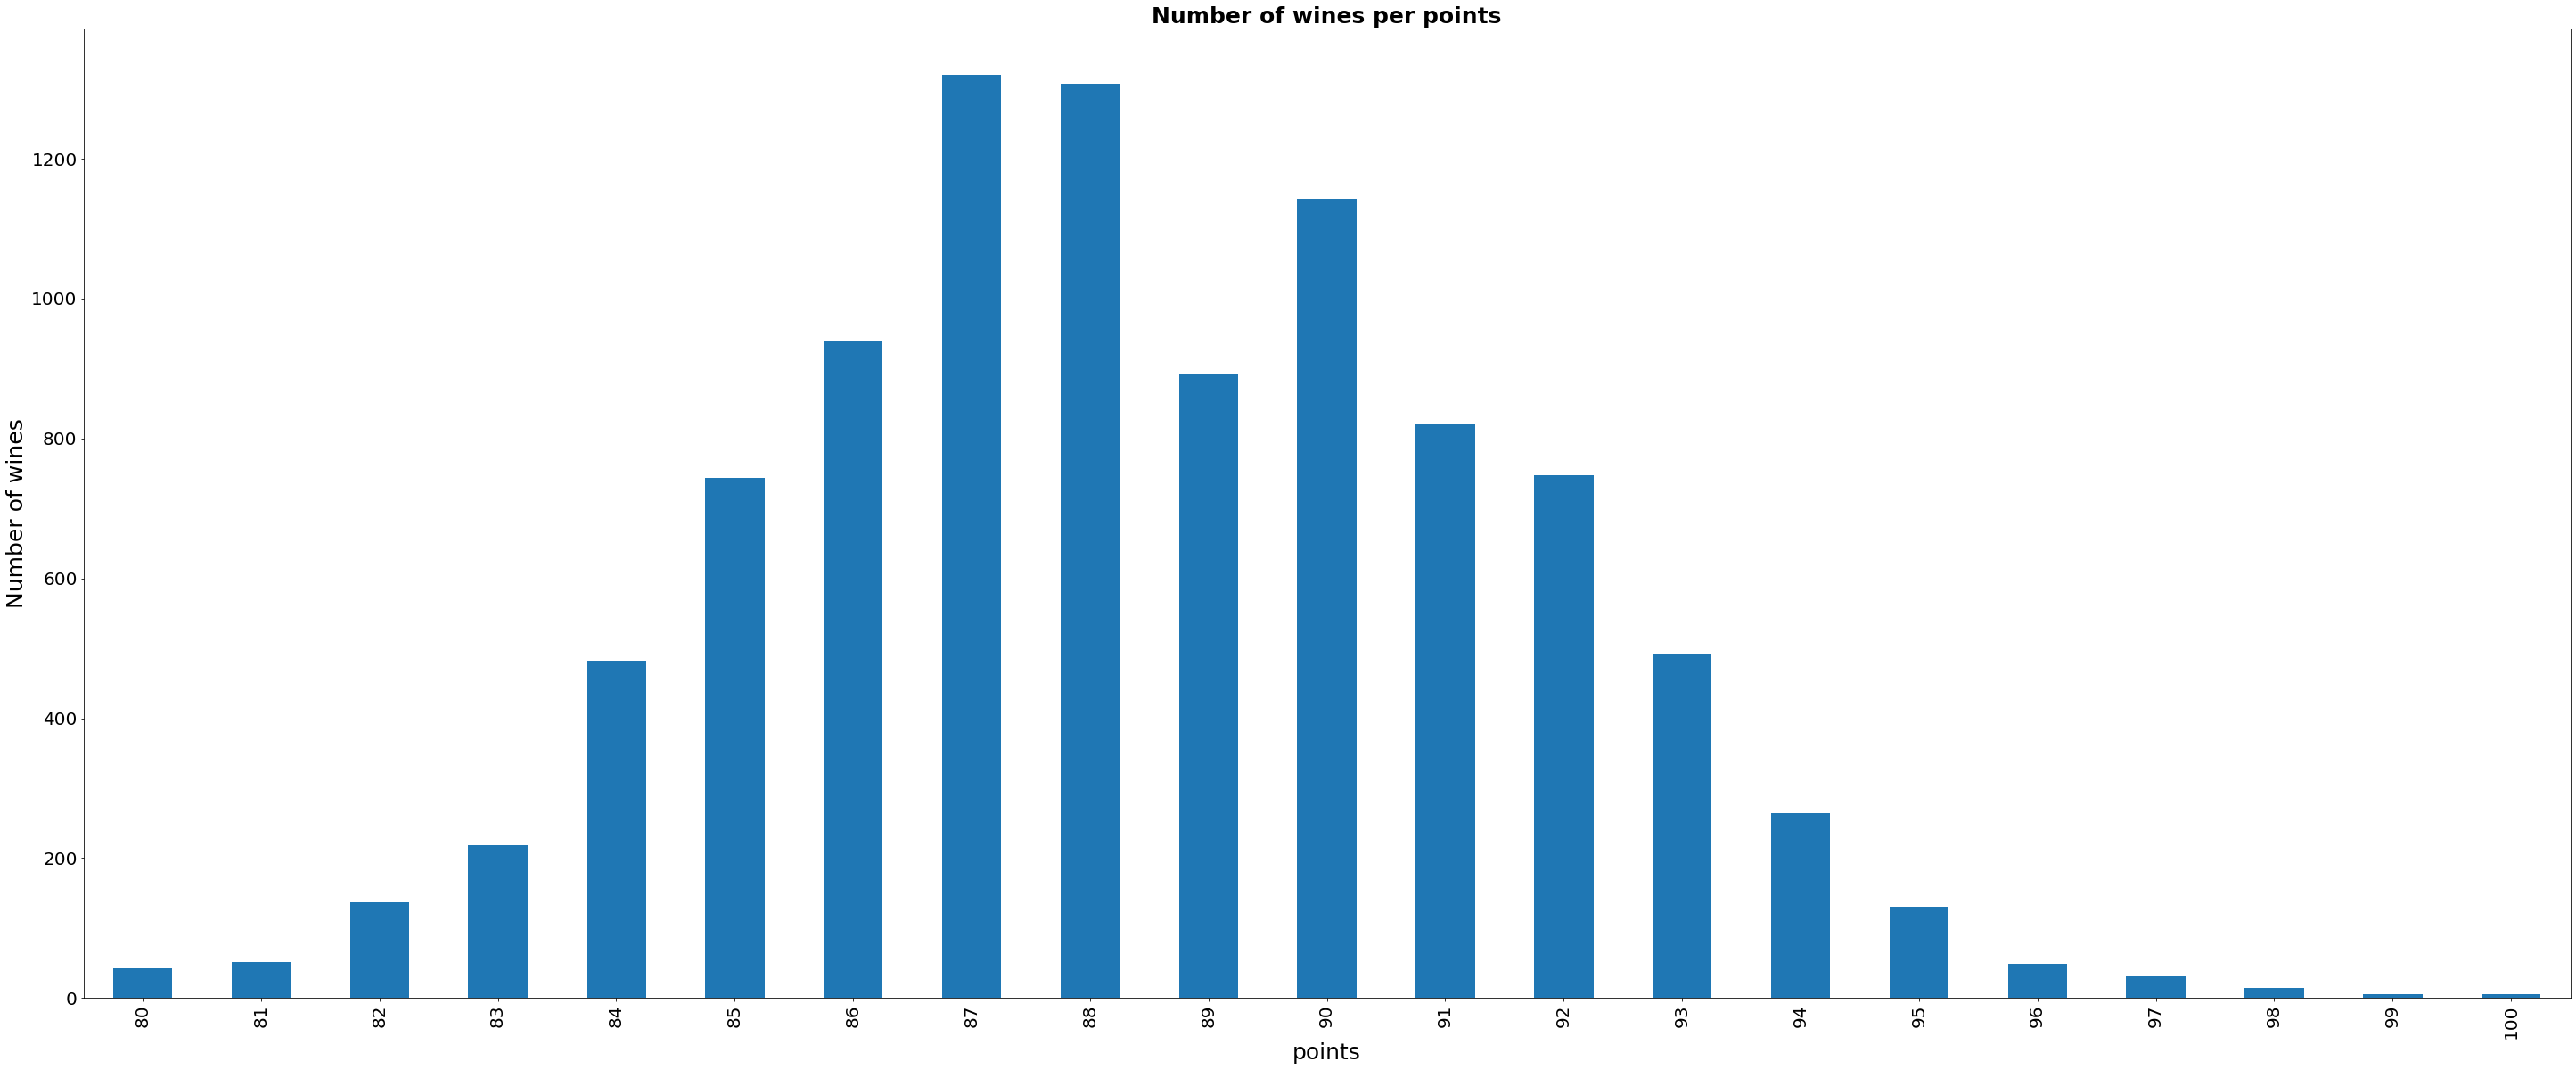

In [173]:
fig, ax = plt.subplots(figsize=(50,20))
plt.xticks(fontsize=20) # X Ticks
plt.yticks(fontsize=20) # Y Ticks
ax.set_title('Number of wines per points', fontweight="bold", size=25) # Title
ax.set_ylabel('Number of wines', fontsize = 25) # Y label
ax.set_xlabel('Points', fontsize = 25) # X label
wine_df.groupby(['points']).count()['description'].plot(ax=ax, kind='bar')

In [174]:

wine_df = wine_df.assign(description_length = wine_df['description'].apply(len))


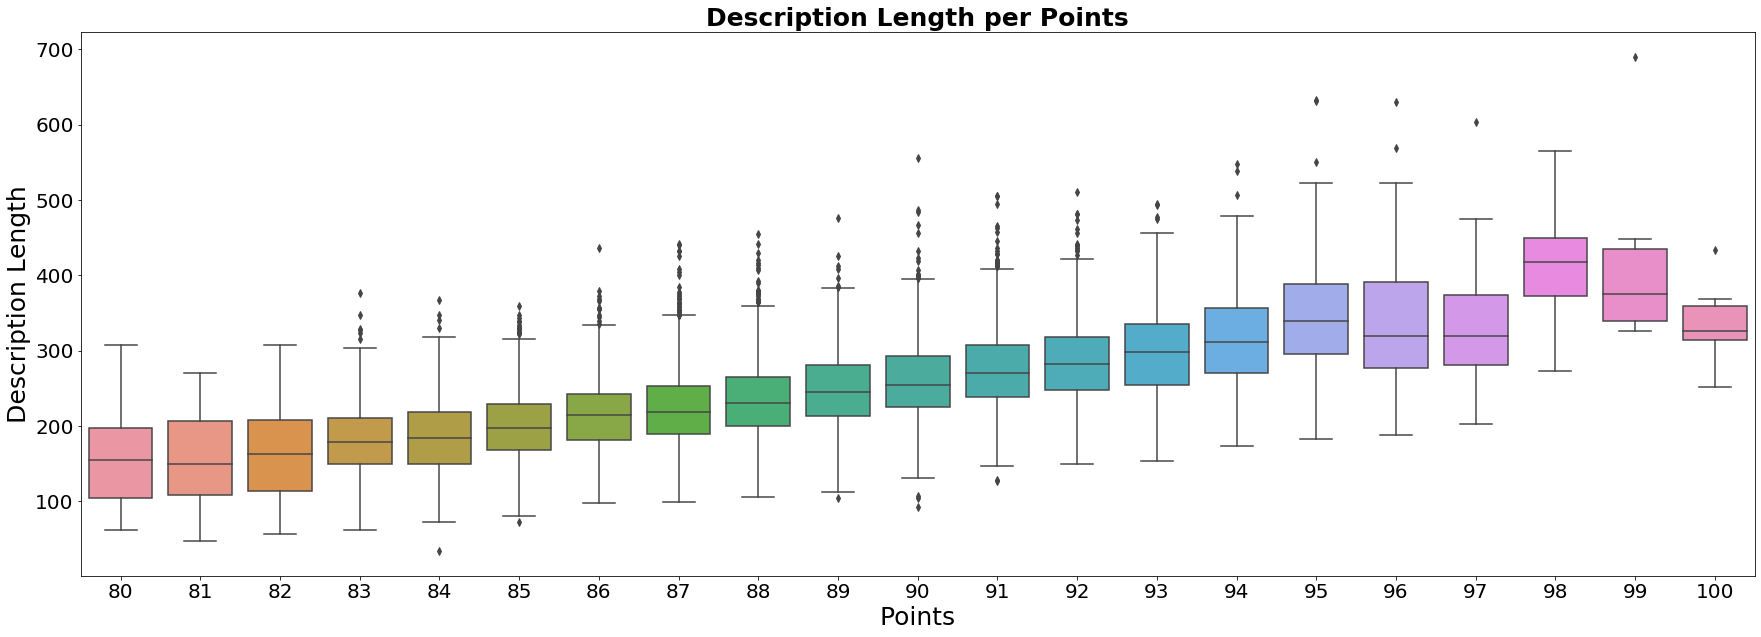

In [175]:
fig, ax = plt.subplots(figsize=(30,10))
sns.boxplot(x='points', y='description_length', data=wine_df)
plt.xticks(fontsize=20) # X Ticks
plt.yticks(fontsize=20) # Y Ticks
ax.set_title('Description Length per Points', fontweight="bold", size=25) # Title
ax.set_ylabel('Description Length', fontsize = 25) # Y label
ax.set_xlabel('Points', fontsize = 25) # X label
plt.show()

In [176]:
round(wine_df['points'].describe(),2)

count    9839.00
mean       88.46
std         3.10
min        80.00
25%        86.00
50%        88.00
75%        91.00
max       100.00
Name: points, dtype: float64

In [28]:
round(wine_df['production_cost'].describe(),2)

count    9839.00
mean        8.50
std        21.59
min         0.69
25%         3.20
50%         5.01
75%         8.48
max       994.25
Name: production_cost, dtype: float64

In [66]:
#Transform method taking points as param
def transform_points_simplified(points):
    if points >= 80 and points < 87:
        return 1 
    elif points >= 87 and points < 92:
        return 2 
    elif points >= 92 and points < 101:
        return 3
    

#Applying transform method and assigning result to new column "points_simplified"
#wine_df = wine_df.assign(points_simplified = wine_df['points'].apply(transform_points_simplified))
#wine_df.head()

,country,province,description,points,production_cost,price,taster_name,winery,profit,profit_percent,description_length,price_grouped,points_simplified
0,Germany,Mosel,Zesty orange peels and apple notes abound in t...,87,5.11,24.0,Anna Lee C. Iijima,Richard Böcking,18.89,369.67,176,medium price,2
1,Argentina,Other,"Baked plum, molasses, balsamic vinegar and che...",87,4.96,30.0,Michael Schachner,Felix Lavaque,25.04,504.84,284,medium price,2
2,Argentina,Mendoza Province,Raw black-cherry aromas are direct and simple ...,87,1.96,13.0,Michael Schachner,Gaucho Andino,11.04,563.27,245,low price,2
3,US,Virginia,"Red fruit aromas pervade on the nose, with cig...",87,6.40,32.0,Alexander Peartree,Quiévremont,25.60,400.00,315,medium price,2
4,US,Oregon,"A stiff, tannic wine, this slowly opens and br...",86,4.40,22.0,Paul Gregutt,Hawkins Cellars,17.60,400.00,163,medium price,1


In [177]:
round(wine_df['price'].describe(),2)

count    9839.00
mean       42.19
std        96.42
min         4.00
25%        17.00
50%        25.00
75%        42.00
max      3300.00
Name: price, dtype: float64

In [178]:
#Transform method taking points as param
def transform_price(price):
    if price >= 4 and price < 18:
        return ('Low price')
    elif price >= 18 and price < 43:
        return ('Medium price')
    elif price >= 43:
        return ('VIP')
    
#Applying transform method and assigning result to new column "points_simplified"
wine_df = wine_df.assign(price_grouped = wine_df['price'].apply(transform_price))
wine_df.tail()

,country,province,description,points,production_cost,price,taster_name,winery,profit,profit_percent,description_length,price_grouped
10582,Austria,Austria,"Bründlmayer makes a particularly felicitous brut, crisp, yeasty, with very pure green and white fruits. It has an intense minerality, tight, structured and finishing with great waves of toast. The...",91,10.09,46.0,Roger Voss,Bründlmayer,35.91,355.90,271,VIP
10583,Austria,Kamptal,"Smooth, creamy aromas are followed by a rich, concentrated mouthful, with spice showing through the green berry fruits, apples and cream flavors. This tastes warm, inviting, with yellow fruits add...",91,6.40,32.0,Roger Voss,Bründlmayer,25.60,400.00,236,Medium price
10584,Germany,Mosel,"Plump, clingy peach and honey notes are cut with streaks of lime in this delicate yet intensely satisfying wine. Off dry in style, it's refreshingly juicy, with a rich, supple mouthfeel offset by ...",90,2.00,17.0,Anna Lee C. Iijima,Bischöfliche Weingüter Trier,15.00,750.00,214,Low price
10585,New Zealand,Hawke's Bay,"This blend of Cabernet Sauvignon-Merlot and Cabernet Franc is full bodied and firm, the tannins just beginning to soften. The aromas and flavors are classic: cedar, vanilla, cassis and tobacco. Dr...",90,7.75,35.0,Joe Czerwinski,Babich,27.25,351.61,209,Medium price
10586,France,Alsace,"A dry style of Pinot Gris, this is crisp with some acidity. It also has weight and a solid, powerful core of spice and baked apple flavors. With its structure still developing, the wine needs to a...",90,6.32,32.0,Roger Voss,Domaine Marcel Deiss,25.68,406.33,216,Medium price


KeyError: 'points_simplified'

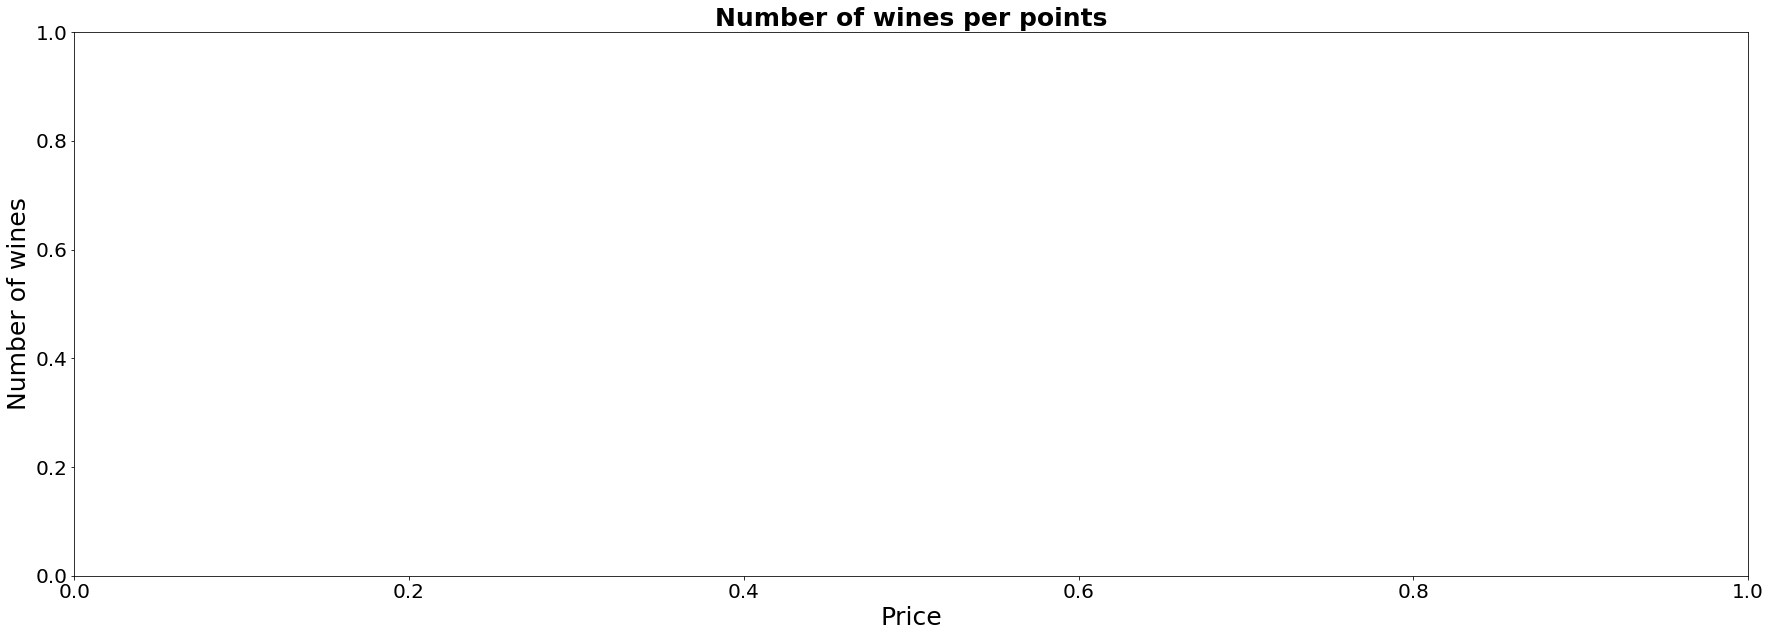

In [119]:
#fig, ax = plt.subplots(figsize=(30,10))
#plt.xticks(fontsize=20) # X Ticks
#plt.yticks(fontsize=20) # Y Ticks
#ax.set_title('Number of wines per points', fontweight="bold", size=25) # Title
#ax.set_ylabel('Number of wines', fontsize = 25) # Y label
#ax.set_xlabel('Price', fontsize = 25) # X label
#wine_df.groupby(['points_simplified']).count()['description'].plot(ax=ax, kind='bar')

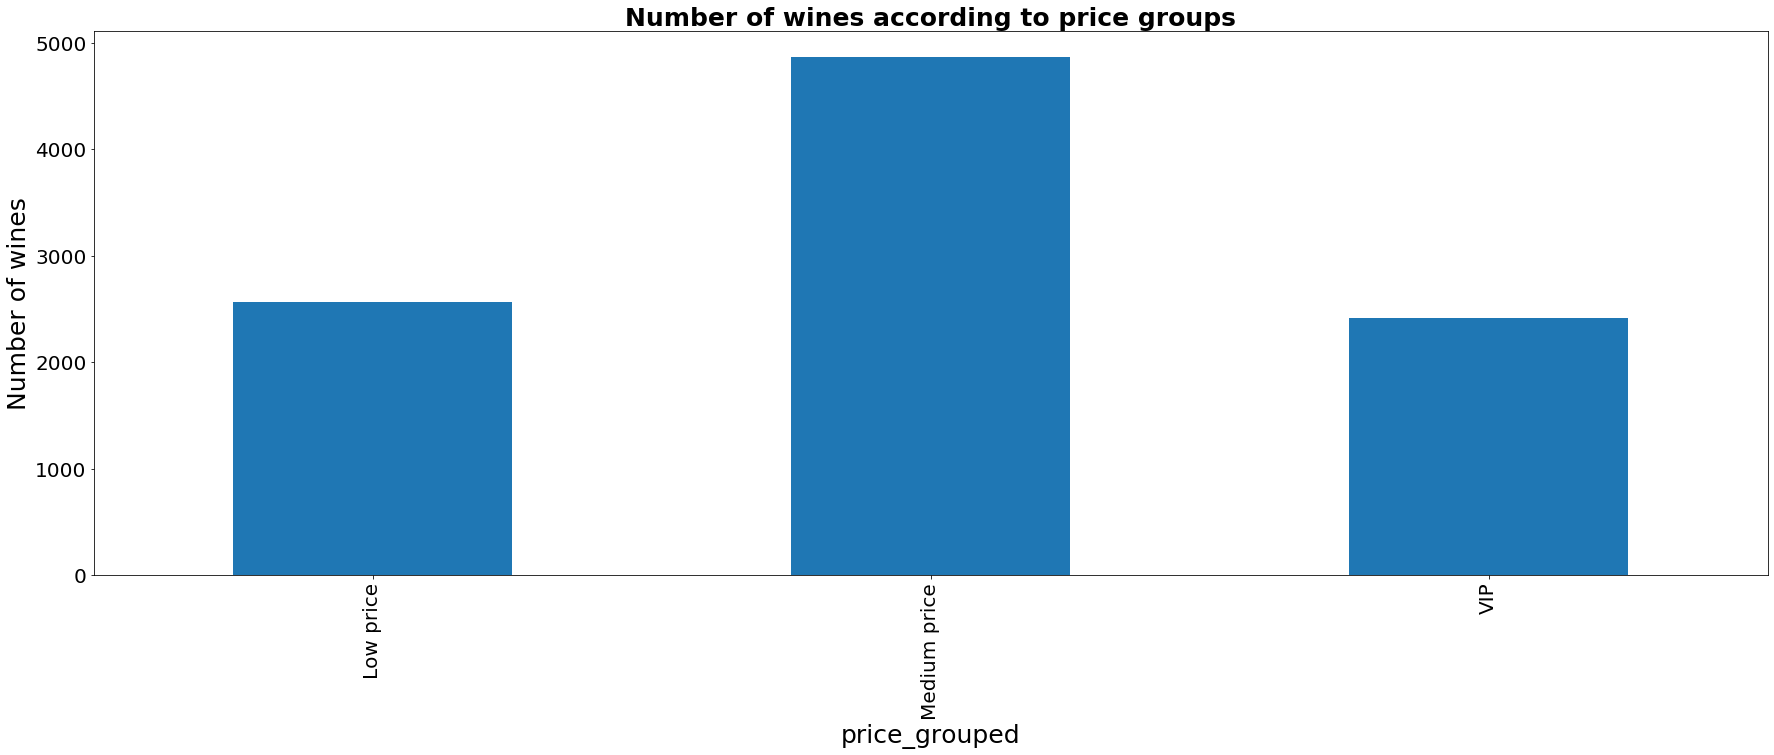

In [179]:
fig, ax = plt.subplots(figsize=(30,10))
plt.xticks(fontsize=20) # X Ticks
plt.yticks(fontsize=20) # Y Ticks
ax.set_title('Number of wines according to price groups', fontweight="bold", size=25) # Title
ax.set_ylabel('Number of wines', fontsize = 25) # Y label
ax.set_xlabel('Points', fontsize = 25) # X label
wine_df.groupby(['price_grouped']).count()['price'].plot(ax=ax, kind='bar')

In [180]:
import nltk
from nltk.tokenize import word_tokenize
from nltk import pos_tag
from nltk.probability import FreqDist
from nltk.corpus import stopwords
from nltk.probability import FreqDist
import re

In [181]:
wine_df = wine_df.reset_index(drop = True)
wine_df['desc']=''

In [182]:
stop_words=set(stopwords.words("english"))

In [183]:
def remove_nums(s):
    return re.sub('[^\s]*[0-9]+[^\s]*', "", s)

In [184]:
from string import punctuation

def remove_punctuation(s):
    global punctuation
    for p in punctuation:
        s = s.replace(p, '')
    return s

In [185]:
list1=[]
new_list=[]
nouns=[]
for i in range(9839):
    list1=remove_nums(wine_df['description'][i])      
    list1=remove_punctuation(list1)    
    list1=word_tokenize(list1)      
    list1 = [item.lower() for item in list1]
    for w in list1:
        if w not in stop_words:
            #print(w)
            new_list.append(w)
    #print(new_list)
    
    fdist = FreqDist(new_list)
    fdist
    #print(nltk.post_tag(fdist))
    for word,pos in pos_tag(fdist):
        if (pos == 'NNS' or pos=='NNP'or pos=='NN'):
            nouns.append(word)
    #print(str(nouns).strip('[]'))       
    #print()
    wine_df['desc'][i]=str(nouns).strip('[]')
    
    list1=[]
    new_list=[]
    nouns=[]


C:\Users\Dilba\Anaconda3\lib\site-packages\ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [186]:
wine_df.head(10)

,country,province,description,points,production_cost,price,taster_name,winery,profit,profit_percent,description_length,price_grouped,desc
0,Germany,Mosel,"Zesty orange peels and apple notes abound in this sprightly, mineral-toned Riesling. Off dry on the palate, yet racy and lean, it's a refreshing, easy quaffer with wide appeal.",87,5.11,24.0,Anna Lee C. Iijima,Richard Böcking,18.89,369.67,176,Medium price,"'orange', 'peels', 'apple', 'notes', 'palate', 'quaffer', 'appeal'"
1,Argentina,Other,"Baked plum, molasses, balsamic vinegar and cheesy oak aromas feed into a palate that's braced by a bolt of acidity. A compact set of saucy red-berry and plum flavors features tobacco and peppery a...",87,4.96,30.0,Michael Schachner,Felix Lavaque,25.04,504.84,284,Medium price,"'plum', 'molasses', 'vinegar', 'cheesy', 'oak', 'feed', 'palate', 'thats', 'acidity', 'compact', 'saucy', 'redberry', 'flavors', 'peppery', 'accents', 'flavor', 'weight', 'balance'"
2,Argentina,Mendoza Province,"Raw black-cherry aromas are direct and simple but good. This has a juicy feel that thickens over time, with oak character and extract becoming more apparent. A flavor profile driven by dark-berry ...",87,1.96,13.0,Michael Schachner,Gaucho Andino,11.04,563.27,245,Low price,"'blackcherry', 'aromas', 'juicy', 'time', 'character', 'extract', 'flavor', 'profile', 'fruits', 'finishes'"
3,US,Virginia,"Red fruit aromas pervade on the nose, with cigar box and menthol notes riding in the back. The palate is slightly restrained on entry, but opens up to riper notes of cherry and plum specked with c...",87,6.40,32.0,Alexander Peartree,Quiévremont,25.60,400.00,315,Medium price,"'fruit', 'aromas', 'pervade', 'cigar', 'box', 'menthol', 'notes', 'palate', 'entry', 'cherry', 'plum', 'blend', 'merlot', 'cabernet', 'sauvignon', 'franc'"
4,US,Oregon,"A stiff, tannic wine, this slowly opens and brings brambly berry flavors into play, along with notes of earthy herbs. There's a touch of bitterness to the tannins.",86,4.40,22.0,Paul Gregutt,Hawkins Cellars,17.60,400.00,163,Medium price,"'wine', 'brings', 'flavors', 'notes', 'herbs', 'theres', 'bitterness', 'tannins'"
5,US,California,"This shows jelly-like flavors of orange and pear, with some earthy tones. The mouthfeel is soft and there's a bounty of oak in the form of buttered toast and caramel notes.",85,4.79,30.0,NaN,RustRidge,25.21,526.30,172,Medium price,"'shows', 'flavors', 'tones', 'theres', 'form', 'caramel', 'notes'"
6,France,Champagne,"This fat, yeasty Champagne is comprised predominantly of Pinot Noir. It has ripe red berry fruit, light acidity and a soft, creamy aftertaste. It's ready to drink.",86,17.42,58.0,Roger Voss,Roland Champion,40.58,232.95,163,VIP,"'yeasty', 'champagne', 'ripe', 'berry', 'fruit', 'acidity', 'creamy', 'drink'"
7,France,Burgundy,"From the warm 2015 vintage, this is a soft and fruity wine. It's open with broad white fruit flavors, the acidity lighter than usual for Chablis, giving it a particularly ripe character. Drink now.",86,4.80,24.0,Roger Voss,Simonnet-Febvre,19.20,400.00,197,Medium price,"'vintage', 'fruity', 'wine', 'fruit', 'flavors', 'chablis', 'character', 'drink'"
8,US,Washington,"Vibrant aromas of ripe pear, white flowers and melon are followed by a just off-dry palate, with lean fruit flavors.",86,4.76,20.0,Sean P. Sullivan,Palencia,15.24,320.17,116,Medium price,"'aromas', 'ripe', 'flowers', 'palate', 'fruit', 'flavors'"
9,Italy,Tuscany,"Forest floor, menthol, espresso, cranberry and pressed violet aromas take shape in the glass. The lean linear palate shows dried sour cherry, licorice and coffee bean alongside assertive close-gra...",88,6.00,30.0,Kerin O’Keefe,Serpaia di Endrizzi,24.00,400.00,312,Medium price,"'floor', 'menthol', 'espresso', 'cranberry', 'violet', 'aromas', 'shape', 'glass', 'palate', 'shows', 'cherry', 'licorice', 'coffee', 'tannins', 'capture', 'fruit'"


In [188]:
round(wine_df['profit_percent'].describe(),2)

count    9839.00
mean      441.60
std       172.40
min       222.58
25%       337.69
50%       400.00
75%       479.48
max      1011.11
Name: profit_percent, dtype: float64

In [189]:
wine_df['profit_percent'].groupby([wine_df['country']]).max()

country
Argentina                 1011.11
Australia                  941.67
Austria                   1011.11
Bosnia and Herzegovina     463.38
Brazil                     400.00
Bulgaria                   755.61
Canada                     634.82
Chile                     1011.11
Croatia                    718.97
Czech Republic             400.00
England                    979.81
France                    1011.11
Georgia                    493.22
Germany                   1005.99
Greece                     931.52
Hungary                    654.49
Israel                     910.83
Italy                     1011.11
Lebanon                    234.93
Luxembourg                 295.68
Mexico                     545.16
Moldova                    676.70
Morocco                    488.24
New Zealand               1001.69
Peru                       400.00
Portugal                  1011.11
Romania                    677.78
Slovenia                   847.37
South Africa               993.75
Spain 

In [190]:
pd.options.display.max_colwidth = 200
df1=wine_df[['country','points','profit_percent','price_grouped','price','desc','description']]
df2=(df1.sort_values('profit_percent', ascending=False)).head(20)
df2.sort_values('price_grouped')

,country,points,profit_percent,price_grouped,desc,description
6657,Argentina,83,1011.11,Low price,"'peach', 'whiteflower', 'forecast', 'palate', 'papaya', 'melon', 'flavors', 'finishes', 'vanilla', 'note'","Peach and white-flower aromas forecast a fleshy, soft palate. Papaya and melon flavors are honeyed, but this finishes bland, with a vanilla note."
9085,France,84,1011.11,Low price,"'fruity', 'wine', 'touches', 'cabernet', 'franc', 'perfume', 'crisp', 'raspberry', 'flavors', 'aftertaste', 'screwcap'","Light and fruity, a wine with touches of typical Cabernet Franc perfume. The wine is dry, crisp with raspberry flavors and a spicy, fresh aftertaste. Screwcap."
9653,Portugal,88,1011.11,Low price,"'feet', 'vines', 'conditions', 'intensity', 'crisp', 'acidity', 'flavors', 'fruity', 'drink'","Grown at 1,800 feet, the vines for this wine benefit from the cool conditions needed to develop aromatic intensity. With crisp acidity combined with spiced pear and nutmeg flavors, it's both tight..."
6581,Portugal,86,1011.11,Low price,"'wine', 'fruit', 'spicy', 'currant', 'flavors', 'tinta', 'roriz', 'drink'","The wine is soft, and full of fruit with attractive spicy black currant flavors. Dominated by the rounded Tinta Roriz, it is an easy wine to drink young."
9736,France,87,1011.11,Low price,"'wine', 'layers', 'acidity', 'crisp', 'amounts', 'flavors', 'currants', 'freshness'","This textured wine is tight with layers of nervy acidity. It is crisp, with good amounts of acidity and flavors of red currants that add extra freshness."
1315,Chile,87,1011.11,Low price,"'melony', 'fruit', 'match', 'stick', 'juicy', 'flavors', 'fruits', 'melon', 'closes'","Melony fruit aromas with a heavy dose of sulfur and match stick are gritty. This is juicy and bright in feel, with flavors of briny citrus fruits and green melon. A heavily briny and lasting finis..."
1033,US,82,1007.01,Medium price,"'textures', 'ripeness', 'levels', 'tannins', 'wood', 'flavors', 'jalapeño', 'pepper'","The texture's all wrong on this wine, because the ripeness levels and tannins are unbalanced. The cherry and wood flavors have streaks of green and jalapeño pepper, and there's some funkiness."
6979,US,91,1007.27,Medium price,"'grapes', 'county', 'river', 'valley', 'rockpile', 'mayacamas', 'winemakers', 'expertise', 'shows', 'balance', 'zesty', 'flavors', 'currants', 'cedar', 'plums', 'finish', 'dusty', 'spices'","The grapes for this interesting and compelling Cab come from all over the county, including Russian River Valley, Rockpile and the Mayacamas Mountains. The winemaker's blending expertise shows in ..."
8145,US,88,1007.27,Medium price,"'wine', 'offers', 'notes', 'coconut', 'pepper', 'cherries', 'flavors', 'concentration', 'feel', 'lingers', 'wood', 'center', 'stage', 'part', 'well'","This 100% varietal wine offers lightly volatile notes of vanilla, coconut, pepper and dried cherries. The fruit flavors show good concentration along with a beguiling feel and a finish that linger..."
1883,Austria,94,1008.03,Medium price,"'offers', 'dark', 'cherry', 'fruit', 'petals', 'core', 'ripe', 'spice', 'everything', 'drink'","This offers brooding, sumptuous, dark cherry fruit tinged with red rose petals. On the palate the core of ripe, intense cherry holds white pepper spice. Everything is still tightly held: wait and ..."
